In [1]:
import os
import sys

import datetime as dt
import re
import math
import copy
import typing as ty

import uuid

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

from eda_utils import *

In [2]:
mainpath = os.environ['MAINPATH']
datapath = mainpath + '\\data'

In [3]:
data = pd.read_csv(f'{datapath}\\train.csv')
data.columns = [col.lower() for col in data.columns]

In [4]:
data.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### MSSubClass Analysis

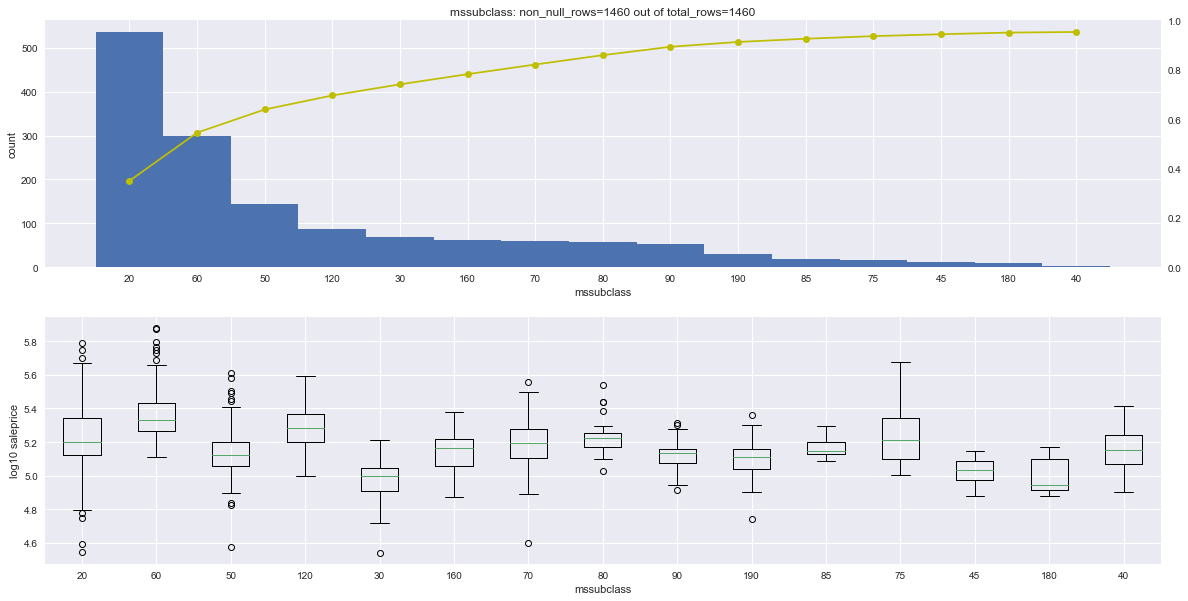

In [5]:
class_col = 'mssubclass'
val_col = 'saleprice'
bp_data, mask = main_class_var_figure(data=data, class_col=class_col, val_col=val_col, log_bp=True)

#### General remarks
> 80% of observations fall within the first 6 classes:
>* 20: 1 story 1946 & newer allstyles
>* 60: 2 story 1946 & newer
>* 50: 1-1/2 story  finished all ages
>* 120: 1 story PUD 1946 & Newer
>* 30: 1 story 1945 & older
>* 160: 2 story pud 1946 & newer

*Insight*: 
* feature engineering required for extracting stories, boolean PUD, age

#### Relation to target (SalesPrice)
> MsSubClass does affect the final sales price considerably, both in central value and in spread.
> Highest sales prices occurr in classes:
>* 20: 1 story 1946 & newer allstyles
>* 60: 2 story 1946 & newer
>* 120: 1 story PUD 1946 & Newer
> Lowest sales prices occurr in classes:
>* 30: 1 story 1945 & older
>* 45: 1-1/2 stories unfinished all ages
>* 180: PUD - Multilevel - incl split lev/foyer

*Insight*:
* Year completed affects the target positively
* Unifinished houses tend to sell for less

### MsZoning Analysis

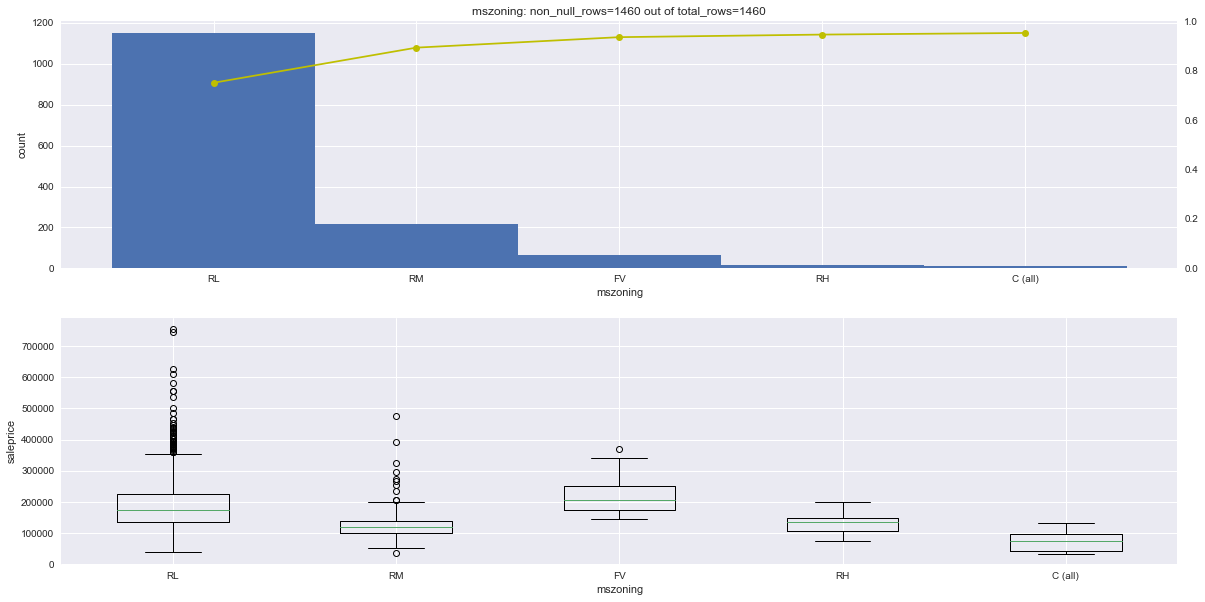

In [7]:
class_col = 'mszoning'
val_col = 'saleprice'
bp_data, mask = main_class_var_figure(data=data, class_col=class_col, val_col=val_col, log_bp=False)

#### General remarks
> 80% of observations fall within the first 2 classes:
>* RL: Residential Low Density
>* RM: Residential Medium Density

*Insight*: 
* Consider removing this feature as it is highly unbalanced.

#### Relation to target (SalesPrice)
> For the most common classes:
>* RL tend tend to have higher prices
>* RM tend to have lower prices.

### LotFrontage analysis

(<Figure size 1440x720 with 1 Axes>, <AxesSubplot:>)

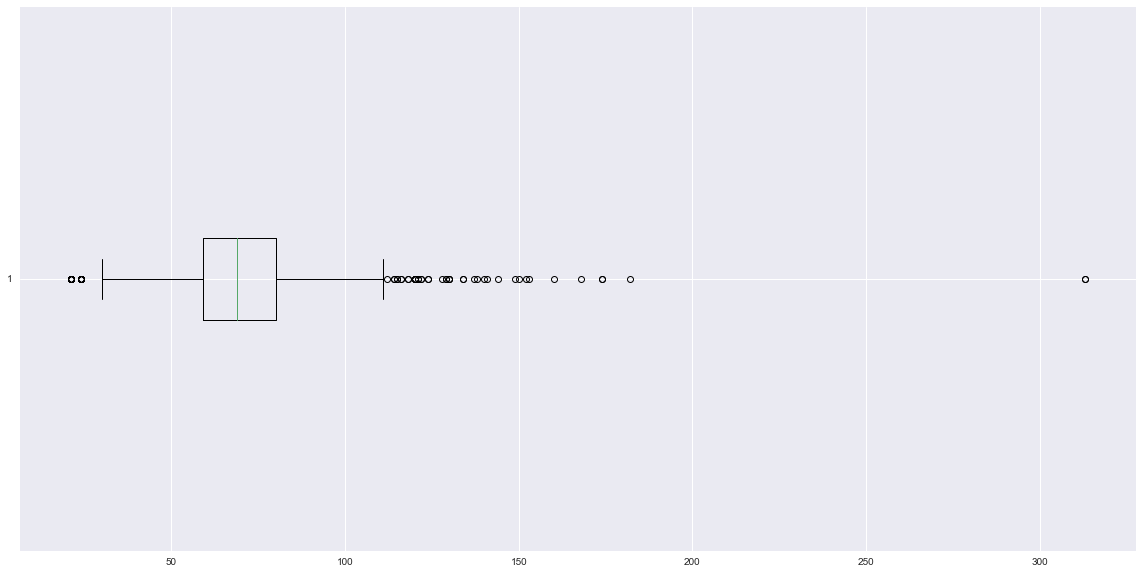

In [6]:
num_col='lotfrontage'
make_boxplot(data=data, num_col=num_col)

(<Figure size 1440x720 with 1 Axes>,
 <AxesSubplot:title={'center':'lotfrontage: non_null_rows=1201 out of total_rows=1460'}, xlabel='lotfrontage', ylabel='density'>)

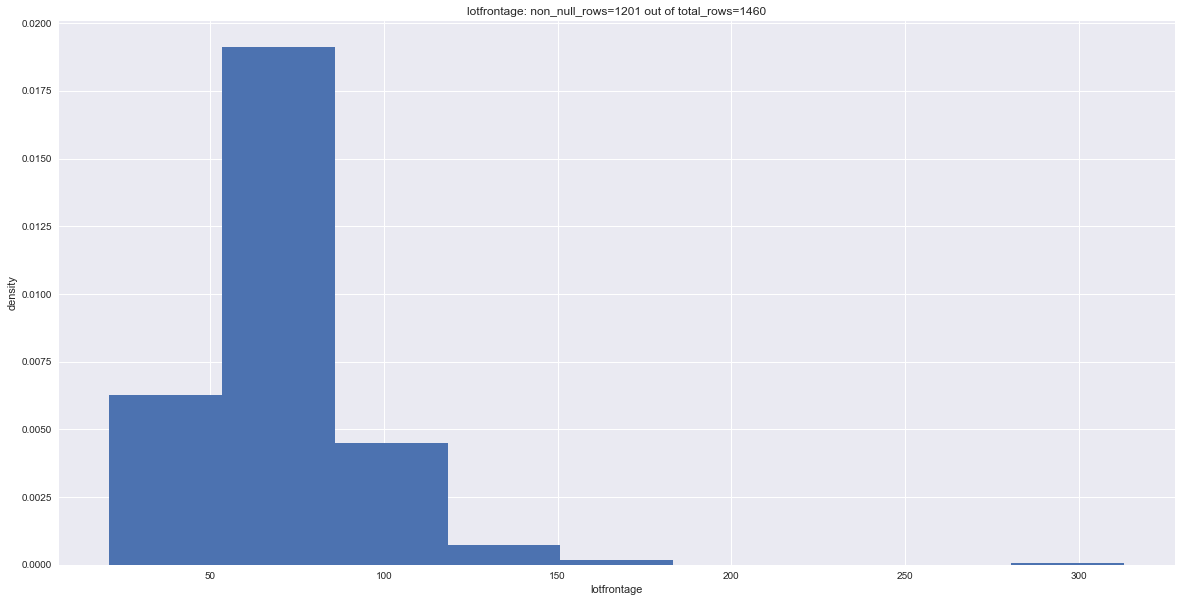

In [7]:
num_col='lotfrontage'
make_hist(data=data, num_col=num_col, log=False)

### LotArea analysis

### Street Analysis

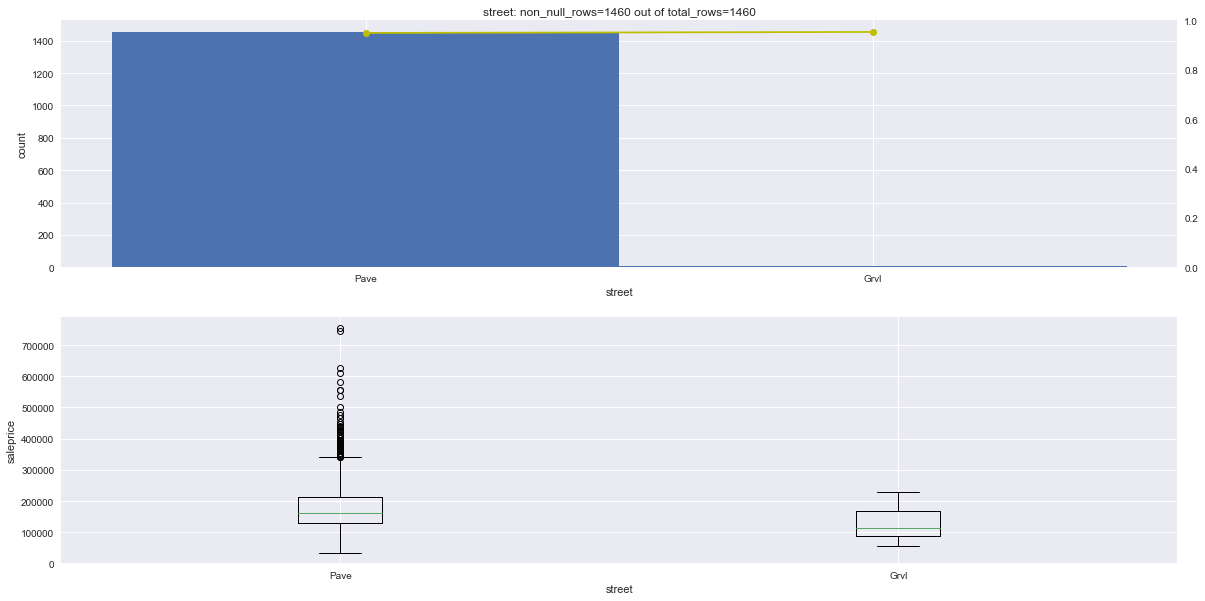

In [8]:
class_col = 'street'
val_col = 'saleprice'
bp_data, mask = main_class_var_figure(data=data, class_col=class_col, val_col=val_col, log_bp=False)

#### General remarks
> Almost all instances have paved roads

*Insight*: 
* Consider removing this feature as it is highly unbalanced.

#### Relation to target (SalesPrice)
> Slightly higher prices for paved housing, however class inbalance weakens this conclusion.